# **AP155 Lab Assignment**
## Module 5: Partial Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.



### Student Information

_Full Name (Last Name, First Name)_: Chua, Winonna Kylie\
_Student No._: 2022-09120\
_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: November 16, 2024 | 11:45 P.M.

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Winonna Kylie C. Chua**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/100

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**The Schrodinger equation and the Crank-Nicolson method**

_Refer to Exercise 9.8 in the Newman text._ In this problem, you will use the Crank-Nicolson method to solve the full time-dependent Schrodinger equation and hence develop a picture of how a wavefunction evolves over time.

Consider an electron (mass $M = 9.109 \times 10^{-31}$ kg) in a box of length $L = 10^{-8}$ m. Suppose that at time $t = 0$ the wavefunction of the electron has the form

$$ \psi(x,0) = \exp\left[-\frac{(x-x_0)^2}{2\sigma^2}\right]e^{i\kappa x},$$
where $x_0 = \frac{L}{2}$, $\sigma = 1 \times 10^{-10}$ m, $\kappa = 5 \times 10^{10} {\rm m}^{-1}$,  and $\psi = 0$ on the walls at $x = 0$ and $x = L$.

1. Perform a single step of the Crank-Nicolson method for this electron, calculating the vector $\psi(t)$ of values of the wavefunction, given the initial wavefunction above and using $N = 1000$ spatial slices with $a = L/N$. Your program will have to perform the following steps. First, given the vector $\psi(0)$ at $t = 0$, you will have to multiply by the matrix $\bf{B}$ to get a vector $\bf{v} = \bf{B}\psi$. Because of the tridiagonal form of $\bf{B}$, this is fairly simple. The $i$th component of $\bf{v}$ is given by
$$ v_i = b_1\psi_i + b_2(\psi_{i+1} + \psi_{i-1}).$$

   You will also have to choose a value for the time-step $h$. A reasonable choice is $h = 10^{-18}$ s. *(30 pts.)*

2. Second you will have to solve the linear system ${\bf Ax}= {\bf v}$ for $\bf{x}$, which gives you the new value of $\psi$. You could do this using a standard linear equation solver like the function $\tt solve$ in numpy's $\tt linalg$. *(20 pts.)*

3. Once you have the code in place to perform a single step of the calculation, extend your program to perform repeated steps and hence solve for $\psi$ at a sequence of times a separation $h$ apart. Note that the matrix $\bf A$ is independent of time, so it doesn't change from one step to another. You can set up the matrix just once and then keep on reusing it for every step. *(30 pts.)*

4. Make an animation of the solution by displaying the real part of the wavefunction at each time-step. You can use the function rate from the package visual to ensure a smooth frame-rate for your animation-- see Section 3.5 on page 117 of the Newman text.

   Run your animation for a while and describe what you see. Write a few sentences explaining in physics terms what is going on in the system. *(20 pts.)*

## **Performing a single step of Crank-Nicolson method for electron.**

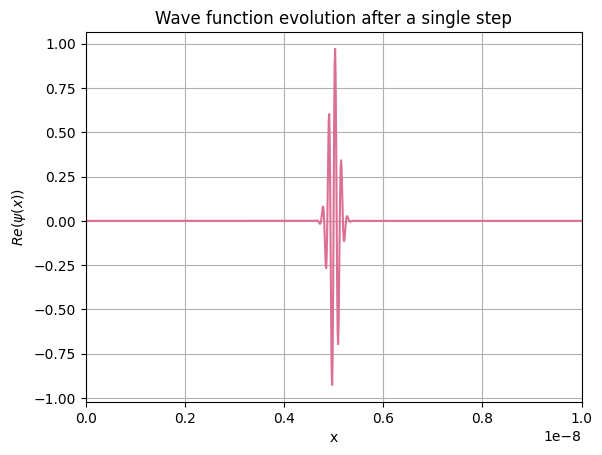

In [ ]:
from numpy.linalg import solve
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Given constants
M = 9.109e-31         # mass of electron [units: kg]
L = 1e-8              # length of box [units: m]
N = 1000              # number of spatial slices
tstep = 1000          # number of time-steps
h = 1e-18             # time-step [units: s]
hbar = 1.0546e-34     # reduced Planck's constant [units: J s]

a = L / N             # size of each spatial slice [units: m]

# Defining the initial wave function
def psi_i(x):
  x_0 = L / 2           # center of the box [units: m]
  sigma = 1e-10         # standard deviation of Gaussian wave packet [units: m]
  kappa = 5e10          # wave number of wave function [units: m^-1]
  function = np.exp(-(x - x_0)**2 / (2 * sigma**2)) * np.exp(1j * kappa * x)
  return function
psi = psi_i(x)      # assigning psi as the initial wave function values
psi[[0, N]] = 0     # boundary conditions

# Extracting values of x and psi at index 100 & assigning them as x0 and psi1, respectively
x0 = x[100]
psi1 = np.real(psi[100])

# Crank-Nicolson matrix elements
# These elements represent the spatial and temporal dependencies of the wave function as it evolves
a_1 = 1 + h * ((1j * hbar) / (2 * M * a**2))    # central diagonal elements of matrix A (related to potential energy & time derivative of wave function)
a_2 = -h * ((1j * hbar) / (4 * M * a**2))       # off-diagonal elements of matrix A (related to spatial derivative of wave function)
b_1 = 1 - h * ((1j * hbar) / (2 * M * a**2))    # central diagonal elements of matrix B (similar to a_1, but has opposite sign for time derivative)
b_2 = h * ((1j * hbar) / (4 * M * a**2))        # off-diagonal elements of matrix B (similar to a_2, but has opposite sign for spatial derivative)

# Defining tridiagonal matrices A and B
A = np.diag(np.full(N - 1, a_1)) + np.diag(np.full(N - 2, a_2), 1) + np.diag(np.full(N - 2, a_2), -1)
B = np.diag(np.full(N - 1, b_1)) + np.diag(np.full(N - 2, b_2), 1) + np.diag(np.full(N - 2, b_2), -1)

# Single step of Crank-Nicolson method
v = np.matmul(B, psi[1:N])       # multiplying B and psi to get vector v
psi[1:N] = solve(A, v)           # solving the linear system Ax = v to get new value of psi

# Plotting the wave function evolution after a single step
plt.plot(x, np.real(psi), color = 'palevioletred')
plt.xlim(0, L)
plt.grid()
plt.title("Wave function evolution after a single step")
plt.xlabel("x")
plt.ylabel("$Re(\psi(x))$")
plt.show()

### ***Discussion of Results:***

In this plot, we can observe the ff:


*   The shape is a Gaussian wave packet (localized near the center).
*   There is some uncertainty due to the spreading of the wave packet.
*   After one step, the wave packet has still maintained its overall shape but has moved very slightly to the right (movement is subtle since the time-step value is small, specifically 1e-18, and it moves to the right due to the positive momentum value [$\hbar \kappa$]).
*   With respect to the given boundary conditions, we can see that the value of the real part of the wave function $\psi(x)$ is 0 at both ends of the "box."

# **Extending program to repeated steps of Crank-Nicolson method for electron.**

In [ ]:
from numpy.linalg import solve
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Given constants
M = 9.109e-31         # mass of electron[units: kg]
L = 1e-8              # length of box [units: m]
N = 1000              # number of spatial slices
tstep = 1000          # number of time-steps
h = 1e-18             # time-step [units: s]
hbar = 1.0546e-34     # reduced Planck's constant [units: J s]

a = L / N             # length of each spatial slice [units: m]

# Defining the initial wave function
def psi_i(x):
  x_0 = L / 2           # center of the box [units: m]
  sigma = 1e-10         # standard deviation of Gaussian wave packet [units: m]
  kappa = 5e10          # wave number of wave function [units: m^-1]
  function = np.exp(-(x - x_0)**2 / (2 * sigma**2)) * np.exp(1j * kappa * x)
  return function

psi = np.zeros(N+1, complex)      # array to store values of wave function
x = np.linspace(0, L, N + 1)      # represents the spatial grid points in the box
psi[:] = psi_i(x)                 # all elements of psi are assigned the value of the initial wave function evaluated at x
psi[[0, N]] = 0                   # boundary conditions

# Crank-Nicolson matrix elements
# These elements represent the spatial and temporal dependencies of the wave function as it evolves
a_1 = 1 + h * ((1j * hbar) / (2 * M * a**2))    # central diagonal elements of matrix A (related to potential energy & time derivative of wave function)
a_2 = -h * ((1j * hbar) / (4 * M * a**2))       # off-diagonal elements of matrix A (related to spatial derivative of wave function)
b_1 = 1 - h * ((1j * hbar) / (2 * M * a**2))    # central diagonal elements of matrix B (similar to a_1, but has opposite sign for time derivative)
b_2 = h * ((1j * hbar) / (4 * M * a**2))        # off-diagonal elements of matrix B (similar to a_2, but has opposite sign for spatial derivative)

# Defining the tridiagonal matrices A and B
A = np.zeros((N-1, N-1), complex)
B = np.zeros((N-1, N-1), complex)
for i in range(N-1):    # In this for loop, the diagonal elements of matrices A and B would be a_1 and b_1, respectively
  A[i, i] = a_1         # Meanwhile, the elements that are one position to the right of the diagonal elements of A and B would be a_2 and b_2, respectively
  B[i, i] = b_1         # Similarly, the elements that are one position to the left of the diagonal elements of A and B would be a_2 and b_2, respectively
  if i < N-2:
    A[i, i+1] = a_2
    B[i, i+1] = b_2
  if i > 0:
    A[i, i-1] = a_2
    B[i, i-1] = b_2

# Animation setup
fig, ax = plt.subplots()
line, = ax.plot(x, np.real(psi), color = 'palevioletred')
ax.set_xlim(0, L)
ax.grid()
ax.set_title("Wave function evolution of electron")
ax.set_xlabel("x")
ax.set_ylabel("$Re(\psi(x))$")

# Crank-Nicolson method
def animate(i):
  global psi                    # modifies the value of psi
  v = np.matmul(B, psi[1:N])    # multiplying B and psi to get vector v
  psi_new = solve(A, v)         # solving the linear system to get new values of wave function
  psi[1:N] = psi_new            # updates the values of psi with the calculated values psi_new
  line.set_ydata(np.real(psi))  # updates the y-values of line with the real part of psi
  return line,

# Animation displaying the real part of the wave function at each time-step
animation = FuncAnimation(fig, animate, frames = tstep*4, interval = 30, blit = True)
HTML(animation.to_html5_video())

Output hidden; open in https://colab.research.google.com to view.

## ***Discussion of Results:***

In the video, we observe the ff:
*   The wave packet initially moves to the right (due to positive momentum value), then moves to the left after encountering the potential barrier (momentum is reversed).
*   The wave packet spreads out as it travels within the box due to dispersion (different parts of the wave packet have varying momenta and speed).
  * As the wave gets more spread out, the uncertainty increases.
*   At the walls, the wave packet is reflected since it encounters a potential barrier.
*   The wave packet has an oscillatory motion after it is reflected from the walls.
  * This is because standing waves are formed due to the Principle of Superposition and the boundary conditions.
*   Interference patterns are present (esp. at the walls) due to the Principle of Superposition.
*   By the boundary conditions and interference, the wave appears to be accelerating or moving faster.
  * This is just a visual perception since the speed of the wave is constant ($\frac{\hbar\kappa}{m}$).
*   Overall, this video highlights the particle-wave duality of the electron.

